<img style="float: right" src="https://upload.wikimedia.org/wikipedia/de/thumb/7/7b/DWD-Logo_2013.svg/500px-DWD-Logo_2013.svg.png" />

# Unzip bz2 files

In [3]:
import bz2
import glob

In [6]:
# extract data that was downloaded from https://opendata.dwd.de/weather/nwp/icon-eu/
path = "/shared/eduard"
for filename in glob.glob("{}/*.bz2".format(path)):
    print (filename)
    with bz2.open(filename, "rb") as f:
        # Decompress data from file
        outfilename = filename.split(".bz2")[0]
        with open(outfilename, 'wb') as out:
            out.write(f.read())
            print ("-> {}".format(outfilename))


/shared/eduard/icon-eu_europe_regular-lat-lon_single-level_2019111400_000_T_2M.grib2.bz2
-> /shared/eduard/icon-eu_europe_regular-lat-lon_single-level_2019111400_000_T_2M.grib2
/shared/eduard/icon-eu_europe_regular-lat-lon_single-level_2019111400_006_T_2M.grib2.bz2
-> /shared/eduard/icon-eu_europe_regular-lat-lon_single-level_2019111400_006_T_2M.grib2
/shared/eduard/icon-eu_europe_regular-lat-lon_single-level_2019111400_012_T_2M.grib2.bz2
-> /shared/eduard/icon-eu_europe_regular-lat-lon_single-level_2019111400_012_T_2M.grib2
/shared/eduard/icon-eu_europe_regular-lat-lon_single-level_2019111400_018_T_2M.grib2.bz2
-> /shared/eduard/icon-eu_europe_regular-lat-lon_single-level_2019111400_018_T_2M.grib2
/shared/eduard/icon-eu_europe_regular-lat-lon_single-level_2019111400_024_T_2M.grib2.bz2
-> /shared/eduard/icon-eu_europe_regular-lat-lon_single-level_2019111400_024_T_2M.grib2


In [101]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read dwd grib data from local directory
x = None
path = "/shared/eduard"
for filename in glob.glob("{}/icon-eu_*.grib2".format(path)):
    print (filename)
    tmp = xr.open_dataset(filename, engine='cfgrib')
    tmp = tmp - 273.15 # Convert to celsius
    if x is None:
        x = tmp
    else:
        x = xr.concat([x, tmp], "valid_time")


In [102]:
# display contents
x

<xarray.Dataset>
Dimensions:            (latitude: 657, longitude: 1097, valid_time: 4)
Coordinates:
    heightAboveGround  int64 2
  * latitude           (latitude) float64 29.5 29.56 29.62 ... 70.38 70.44 70.5
  * longitude          (longitude) float64 -23.5 -23.44 -23.38 ... 44.94 45.0
    time               datetime64[ns] 2019-11-14
    step               (valid_time) timedelta64[ns] 00:00:00 ... 1 days 00:00:00
  * valid_time         (valid_time) datetime64[ns] 2019-11-14 ... 2019-11-15
Data variables:
    t2m                (valid_time, latitude, longitude) float32 21.603485 ... 1.4719849
Attributes:
    GRIB_edition:            2
    GRIB_centre:             edzw
    GRIB_centreDescription:  Offenbach 
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Offenbach 
    history:                 2019-11-14T16:45:09 GRIB to CDM+CF via cfgrib-0....

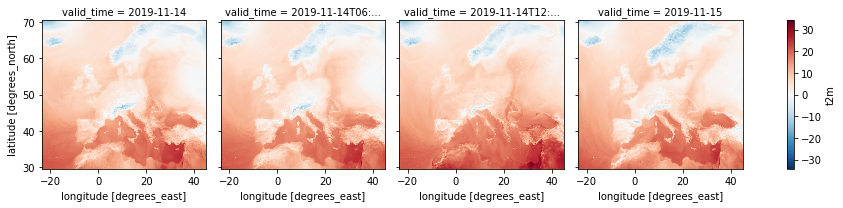

In [100]:
# Plotting xarray https://xarray.pydata.org/en/v0.7.1/plotting.html
# plot 3 dimensional, optionally: wrap after 2 plots
x.t2m.plot(x="longitude", y="latitude", col="valid_time") #, col_wrap=2)